In [1]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm
from collections import Counter
from scipy.stats import binomtest
import os

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

d_abrev = {"LiangSteinNeuron":"FC exc. neur.", "FetalChondrocytes":"F chond.", "SertoliMale":"FG sertoli", "preGC_IIaFemale":"FG preGC IIa",\
          "NeuralFemale":"FG neur.", "FetalGonadImmuneFemale":"FG immune", "VIP":"AC VIP inh. neur.", "LiangSteinProgenitor":"FC prog.",\
          "AdultHeartVentricularCardiomyocyte":"AH cardiomyo.", "AdultLoopOfHenle":"AK loop of henle", "FetalBrainNeurGlioblast_CB_VZ":"FCB glioblast",\
         "AdultProximalTubule":"AK prox. tub.", "FetalLeydigMale":"FG leydig", "SST":"AC SST inh neur.", "KosoyRoussosControlMicroglia":"AC microglia",\
         "FetalBrainFloorPlate":"FB fl. plate", "FetalArterialECs":"FH endoth.", "ASCT":"AC astro.", "FetalBrainCOP":"FB COP",\
         "AMY":"AA neur.", "PVALB":"AC PVALB inh neur.", "ITL23":"AC L2-3 IT neur.", "FetalBrainNeurCB_GNP_IPC_1":"FB inter. prog.", "FetalBrainNeurDAergic":"FB DA neur.",\
          "OGC":"AC Oligo.", "D1Pu":"AP D1 inh neur.", "FetalBrainNeurSerotonergic":"FB 5-HT neur.", "FetalBrainNeurDRG_2":"FS DRG neur.",\
          "FetalHeartPericytes":"FH peri.", "FetalHeartEndocardium":"FH endocard.", "FetalHeartCardiacFibroblasts":"FH fibro.", "FetalBrainNeurPurkinje_6":"FCB Purk. inh neur.",\
          "AdultHeartSmoothMuscle":"AH smooth musc.", "FetalBrainRoofPlate":"FB ro. plate"}

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [19]:
species_lafr_order = ["Dasypus_novemcinctus", "Homo_sapiens", "Macaca_mulatta", "Callithrix_jacchus", "Lemur_catta", "Nycticebus_pygmaeus", "Mus_musculus", "Heterocephalus_glaber", "Ictidomys_tridecemlineatus", "Orcinus_orca", "Bos_taurus", "CanFam4", "Equus_caballus", "Felis_catus_fca126", "Odobenus_rosmarus", "Pteropus_alecto", "Myotis_brandtii", "Desmodus_rotundus", "Condylura_cristata"]
species_dnov_order = ["Loxodonta_africana", "Homo_sapiens", "Macaca_mulatta", "Callithrix_jacchus", "Lemur_catta", "Nycticebus_pygmaeus", "Mus_musculus", "Heterocephalus_glaber", "Ictidomys_tridecemlineatus", "Orcinus_orca", "Bos_taurus", "CanFam4", "Equus_caballus", "Felis_catus_fca126", "Odobenus_rosmarus", "Pteropus_alecto", "Myotis_brandtii", "Desmodus_rotundus", "Condylura_cristata"]
len(species_dnov_order)

19

In [6]:
v = pd.read_csv("IncreaseCTS/IncreaseCTS_FetalBrainCOP.txt", sep = "\t")
v[v["SpecSup447"] == 250]

,ID,SpecSup447,EE_Cut,PhyloP447Cutoff,Metric,Median fixed EE_Dif,Number fixed variants,Median polymorphic EE_Dif,Number polymorphic variants,Fisher exact p-value,...,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Num Fixed EE_Dif > 0.1,Num Fixed EE_Dif < -0.1,Binom p-value,Mean Fixed EE_Dif,Fixed EE_Dif Z-score rel 0,Proportion
72,NoChange,250,0.0,NoChange,EE_Dif,0.000027,5498973,-0.000001,1443454,2.684524e-61,...,0.031005,0.000371,"[[2241284, 3257689], [577381, 866073]]","[[2241284, 3257689], [577382, 866072]]",5939,5853,0.433773,0.000068,0.006023,0.60
73,NoChange,250,0.0,PhyloPG1,EE_Dif,0.000041,762174,0.000016,205222,3.895435e-07,...,0.025413,0.000410,"[[309589, 452585], [82088, 123134]]","[[309589, 452585], [82089, 123133]]",938,988,0.264193,0.000035,0.002876,0.60
74,NoChange,250,0.0,NoChange,EE_Dif,0.000027,5498973,-0.000001,1443454,1.753391e-49,...,0.029660,0.000875,"[[1684670, 3814303], [433036, 1010418]]","[[1684670, 3814303], [433037, 1010417]]",5939,5853,0.433773,0.000068,0.006023,0.70
75,NoChange,250,0.0,PhyloPG1,EE_Dif,0.000041,762174,0.000016,205222,9.509545e-06,...,0.023711,0.000950,"[[232511, 529663], [61566, 143656]]","[[232511, 529663], [61567, 143655]]",938,988,0.264193,0.000035,0.002876,0.70
76,NoChange,250,0.0,NoChange,EE_Dif,0.000027,5498973,-0.000001,1443454,3.719523e-31,...,0.026693,0.001783,"[[1123791, 4375182], [288690, 1154764]]","[[1123791, 4375182], [288691, 1154763]]",5939,5853,0.433773,0.000068,0.006023,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,NoRepeatsNoPseudos,250,0.5,PhyloPG1,EE_Dif,-0.000322,5540,-0.000441,1411,1.753168e-02,...,0.207368,0.026684,"[[683, 4857], [141, 1270]]","[[683, 4857], [142, 1269]]",145,166,0.256718,-0.001174,-0.022818,0.90
212,NoRepeatsNoPseudos,250,0.5,NoChange,EE_Dif,0.000103,27792,-0.000040,6818,4.644100e-01,...,0.045723,0.057987,"[[1451, 26341], [340, 6478]]","[[1451, 26341], [341, 6477]]",677,687,0.807483,0.000359,0.007192,0.95
213,NoRepeatsNoPseudos,250,0.5,PhyloPG1,EE_Dif,-0.000322,5540,-0.000441,1411,1.181923e-02,...,0.283827,0.048087,"[[379, 5161], [70, 1341]]","[[379, 5161], [71, 1340]]",145,166,0.256718,-0.001174,-0.022818,0.95
214,NoRepeatsNoPseudos,250,0.5,NoChange,EE_Dif,0.000103,27792,-0.000040,6818,4.831452e-01,...,-0.100317,0.178263,"[[254, 27538], [68, 6750]]","[[254, 27538], [69, 6749]]",677,687,0.807483,0.000359,0.007192,0.99


In [11]:
df = pd.DataFrame()
for file in os.listdir("IncreaseCTS"):
    if "Swap" not in file:
        v = pd.read_csv("IncreaseCTS/" + file, sep = "\t")
        v = v[v["EE_Cut"] == 0.3]
        v = v[(v["ID"] == "NoRepeatsNoPseudos") & (v["SpecSup447"] == 0) & (v["Proportion"] == 0.8)]
        v["Cell type"] = np.repeat(d_abrev[file.replace(".txt", "").replace("IncreaseCTS_", "").replace("_Group1", "").replace("_SwapNeur", "")], v.shape[0])
        df = pd.concat([df, v])
df.drop(["SpecSup447", "EE_Cut", "PhyloP447Cutoff", "Metric"], axis = 1).sort_values("Fisher exact p-value; alt greater")

,ID,Median fixed EE_Dif,Number fixed variants,Median polymorphic EE_Dif,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Num Fixed EE_Dif > 0.1,Num Fixed EE_Dif < -0.1,Binom p-value,Mean Fixed EE_Dif,Fixed EE_Dif Z-score rel 0,Proportion,Cell type
44,NoRepeatsNoPseudos,-0.000072,115025,-0.000342,31934,0.000286,4.726616e-07,0.000145,2.363308e-07,0.055462,0.008464,"[[24072, 90953], [6386, 25548]]","[[24072, 90953], [6387, 25547]]",1003,1040,4.257670e-01,-9.819793e-06,-0.000343,0.8,FC exc. neur.
44,NoRepeatsNoPseudos,0.000035,59564,-0.000298,15698,0.011810,2.161271e-05,0.005962,1.080636e-05,0.054741,0.006591,"[[12458, 47106], [3139, 12559]]","[[12458, 47106], [3140, 12558]]",74,131,8.334318e-05,-2.551707e-04,-0.015045,0.8,FB DA neur.
44,NoRepeatsNoPseudos,0.000074,81910,-0.000205,20080,0.033222,1.103250e-04,0.016665,5.516248e-05,0.041038,0.008771,"[[16936, 64974], [4015, 16065]]","[[16936, 64974], [4016, 16064]]",508,448,5.630905e-02,1.821406e-04,0.007355,0.8,F chond.
44,NoRepeatsNoPseudos,0.000020,179880,-0.000273,48287,0.084713,3.917090e-05,0.042428,1.958545e-05,0.021869,0.010353,"[[36617, 143263], [9657, 38630]]","[[36617, 143263], [9658, 38629]]",1406,1699,1.571460e-07,-4.519525e-04,-0.015286,0.8,FCB Purk. inh neur.
44,NoRepeatsNoPseudos,0.000069,59563,-0.000124,16189,0.195992,1.501885e-02,0.098458,7.509425e-03,0.028358,0.008172,"[[12188, 47375], [3237, 12952]]","[[12188, 47375], [3238, 12951]]",310,381,7.701383e-03,-9.652868e-05,-0.003968,0.8,FG preGC IIa
44,NoRepeatsNoPseudos,0.000039,170177,-0.000151,43187,0.197835,4.749487e-04,0.099084,2.374744e-04,0.017248,0.009878,"[[34512, 135665], [8637, 34550]]","[[34512, 135665], [8638, 34549]]",3151,3155,9.698647e-01,2.036654e-04,0.005059,0.8,FB COP
44,NoRepeatsNoPseudos,0.000254,35575,0.000043,9205,0.360204,1.032017e-01,0.181323,5.160084e-02,0.026644,0.007296,"[[7268, 28307], [1840, 7365]]","[[7268, 28307], [1841, 7364]]",292,342,5.156440e-02,-5.979318e-07,-0.000022,0.8,FG sertoli
44,NoRepeatsNoPseudos,0.000266,67492,-0.000003,15514,0.512943,3.979393e-04,0.257531,1.989696e-04,0.014635,0.006773,"[[13657, 53835], [3102, 12412]]","[[13657, 53835], [3103, 12411]]",520,474,1.534539e-01,3.426926e-04,0.013538,0.8,FG immune
44,NoRepeatsNoPseudos,0.000236,191,-0.000272,63,0.550549,6.735915e-01,0.306757,3.367957e-01,0.219373,0.003511,"[[46, 145], [12, 51]]","[[46, 145], [13, 50]]",0,0,1.000000e+00,3.714625e-04,0.066733,0.8,FH fibro.
44,NoRepeatsNoPseudos,-0.000117,58993,-0.000090,16553,0.672775,4.195765e-01,0.337425,2.097883e-01,0.009438,0.008452,"[[11888, 47105], [3310, 13243]]","[[11888, 47105], [3311, 13242]]",457,448,7.903114e-01,1.778159e-04,0.006323,0.8,AH cardiomyo.


In [13]:
df = pd.DataFrame()
for file in os.listdir("IncreaseCTS"):
    if "Swap" in file:
        v = pd.read_csv("IncreaseCTS/" + file, sep = "\t")
        v = v[v["EE_Cut"] == 0.3]
        v = v[(v["ID"] == "NoRepeatsNoPseudos") & (v["SpecSup447"] == 0) & (v["Proportion"] == 0.8)]
        v["Cell type"] = np.repeat(d_abrev[file.replace(".txt", "").replace("IncreaseCTS_", "").replace("_SwapNeur", "")], v.shape[0])
        df = pd.concat([df, v])
df.drop(["SpecSup447", "EE_Cut", "PhyloP447Cutoff", "Metric"], axis = 1).sort_values("Fisher exact p-value; alt greater")

,ID,Median fixed EE_Dif,Number fixed variants,Median polymorphic EE_Dif,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Num Fixed EE_Dif > 0.1,Num Fixed EE_Dif < -0.1,Binom p-value,Mean Fixed EE_Dif,Fixed EE_Dif Z-score rel 0,Proportion,Cell type
44,NoRepeatsNoPseudos,-0.000104,95808,-0.000319,27284,0.002769,2.582700e-04,0.001387,1.291350e-04,0.049885,0.007957,"[[19957, 75851], [5456, 21828]]","[[19957, 75851], [5457, 21827]]",825,847,0.607565,-0.000116,-0.004094,0.8,FC exc. neur.
44,NoRepeatsNoPseudos,0.000109,79765,-0.000261,19382,0.018492,7.016615e-07,0.009372,3.508307e-07,0.045933,0.008416,"[[16562, 63203], [3876, 15506]]","[[16562, 63203], [3877, 15505]]",458,396,0.036792,0.000202,0.008406,0.8,F chond.
44,NoRepeatsNoPseudos,0.000280,37299,0.000083,9638,0.021095,3.095199e-02,0.010704,1.547599e-02,0.063555,0.006875,"[[7859, 29440], [1927, 7711]]","[[7859, 29440], [1928, 7710]]",284,334,0.048628,0.000041,0.001545,0.8,FG sertoli
44,NoRepeatsNoPseudos,0.000231,66925,-0.000072,15456,0.206635,4.953693e-04,0.103746,2.476847e-04,0.027909,0.006768,"[[13692, 53233], [3091, 12365]]","[[13692, 53233], [3092, 12364]]",548,484,0.049814,0.000380,0.014695,0.8,FG immune
44,NoRepeatsNoPseudos,-0.000183,63076,-0.000099,18727,0.356729,9.973866e-01,0.178532,4.986933e-01,0.019168,0.005324,"[[12812, 50264], [3745, 14982]]","[[12812, 50264], [3746, 14981]]",205,208,0.921620,0.000051,0.002840,0.8,AC microglia
44,NoRepeatsNoPseudos,0.000034,162562,-0.000061,41338,0.477106,3.281522e-02,0.239309,1.640761e-02,0.009803,0.009658,"[[32769, 129793], [8267, 33071]]","[[32769, 129793], [8268, 33070]]",3039,2966,0.352823,0.000242,0.006040,0.8,FB COP
44,NoRepeatsNoPseudos,-0.000210,121821,-0.000197,35308,0.640054,2.857772e-01,0.320302,1.428886e-01,0.007149,0.003826,"[[24504, 97317], [7061, 28247]]","[[24504, 97317], [7062, 28246]]",129,157,0.110207,-0.000200,-0.014085,0.8,AC astro.
44,NoRepeatsNoPseudos,0.000048,54633,-0.000003,14882,0.808497,3.369841e-01,0.405394,1.684921e-01,0.005811,0.008353,"[[10978, 43655], [2976, 11906]]","[[10978, 43655], [2977, 11905]]",261,336,0.002429,-0.000155,-0.006359,0.8,FG preGC IIa
44,NoRepeatsNoPseudos,0.000048,122687,-0.000047,34477,0.878954,2.785729e-02,0.440622,1.392865e-02,0.002402,0.009025,"[[24585, 98102], [6895, 27582]]","[[24585, 98102], [6896, 27581]]",1087,1041,0.329314,0.000185,0.006408,0.8,AK loop of henle
44,NoRepeatsNoPseudos,-0.000028,191,0.000256,68,0.865741,3.968004e-01,0.463793,8.021246e-01,0.093373,0.003242,"[[41, 150], [13, 55]]","[[41, 150], [14, 54]]",0,0,1.000000,-0.000468,-0.070778,0.8,FH fibro.


In [6]:
ranks = {}

for ee_cut in [0.3, 0.4, 0.5]:
    for cuttt in [0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
        for spec_sup in [0, 250]:
            for rep in ["NoChange", "NoRepeatsNoPseudos"]:
                df = pd.DataFrame()
                for file in os.listdir("IncreaseCTS"):
                    if "Swap" not in file:
                        v = pd.read_csv("IncreaseCTS/" + file, sep = "\t")
                        v = v[v["EE_Cut"] == ee_cut]
                        v = v[(v["ID"] == rep) & (v["SpecSup447"] == spec_sup) & (v["Proportion"] == cuttt) & (v["PhyloP447Cutoff"] == "NoChange")]
                        v["Cell type"] = np.repeat(d_abrev[file.replace(".txt", "").replace("_Group1", "").replace("IncreaseCTS_", "").replace("_SwapNeur", "")], v.shape[0])
                        df = pd.concat([df, v])
                df = df.sort_values("Fisher exact p-value; alt greater")
                df.index = list(range(1, df.shape[0] + 1))

                for index, row in df.iterrows():
                    if row["Cell type"] not in ranks.keys():
                        ranks[row["Cell type"]] = [index]
                    else:
                        ranks[row["Cell type"]].append(index)

In [8]:
ranks = {}

for ee_cut in [0.3, 0.4, 0.5]:
    for cuttt in [0.6, 0.7, 0.8]:
        for spec_sup in [0]:
            for rep in ["NoChange", "NoRepeatsNoPseudos"]:
                df = pd.DataFrame()
                for file in os.listdir("IncreaseCTS"):
                    if "Swap" not in file:
                        v = pd.read_csv("IncreaseCTS/" + file, sep = "\t")
                        v = v[v["EE_Cut"] == ee_cut]
                        v = v[(v["ID"] == rep) & (v["SpecSup447"] == spec_sup) & (v["Proportion"] == cuttt) & (v["PhyloP447Cutoff"] == "NoChange")]
                        v["Cell type"] = np.repeat(d_abrev[file.replace(".txt", "").replace("_Group1", "").replace("IncreaseCTS_", "").replace("_SwapNeur", "")], v.shape[0])
                        df = pd.concat([df, v])
                df = df.sort_values("Fisher exact p-value; alt greater")
                df.index = list(range(1, df.shape[0] + 1))

                for index, row in df.iterrows():
                    if row["Cell type"] not in ranks.keys():
                        ranks[row["Cell type"]] = [index]
                    else:
                        ranks[row["Cell type"]].append(index)

In [9]:
out = []
for r in ranks.keys():
    out.append([r, np.mean(ranks[r])])
dff = pd.DataFrame(out)
dff.sort_values(1)

,0,1
2,FC exc. neur.,2.666667
7,FB COP,4.166667
3,FCB Purk. inh neur.,4.555556
5,FG sertoli,6.277778
14,AH cardiomyo.,7.000000
0,FG immune,7.111111
4,F chond.,7.111111
10,AC microglia,8.111111
11,FG preGC IIa,8.166667
8,AK loop of henle,10.500000


In [8]:
out = []
for r in ranks.keys():
    out.append([r, np.mean(ranks[r])])
dff = pd.DataFrame(out)
dff.sort_values(1)

,0,1
1,FC exc. neur.,1.875000
5,FB COP,4.763889
8,AC microglia,5.125000
12,AH cardiomyo.,5.250000
9,FG preGC IIa,5.819444
2,F chond.,6.277778
3,FG sertoli,6.833333
15,AC astro.,7.625000
0,FG immune,8.277778
6,AK loop of henle,9.125000


In [115]:
out = []
for r in ranks.keys():
    out.append([r, np.mean(ranks[r])])
dff = pd.DataFrame(out)
dff.sort_values(1)

,0,1
1,FC exc. neur.,1.888889
8,AC microglia,4.916667
5,FB COP,5.055556
12,AH cardiomyo.,5.194444
9,FG preGC IIa,6.138889
3,FG sertoli,6.361111
2,F chond.,6.694444
0,FG immune,7.500000
15,AC astro.,8.527778
6,AK loop of henle,9.333333


In [12]:
v = pd.read_csv("Fixed_LiangSteinNeuron.txt.gz", sep = "\t")
vv = pd.read_csv("Poly_MAF0.25_LiangSteinNeuron.txt.gz", sep = "\t")


try:
    vv = add_unfold(vv)
    vv_ref = vv[vv["Human ref"] == vv["Chimp ref"]]
    vv_alt = vv[vv["Human alt"] == vv["Chimp ref"]]
    vv_ref["fixed logfc"] = -vv_ref["logfc"].astype(float)
    vv_alt["fixed logfc"] = vv_alt["logfc"].astype(float)
    vv = pd.concat([vv_ref, vv_alt])
except:
    pass

te_blacklist = pd.read_csv("BlacklistTE_Variants.txt", sep = "\t")
    
v = v[~v["Position"].isin(te_blacklist["Position"])]
vv = vv[~vv["Position"].isin(te_blacklist["Position"])]

v.index = v["Position"]
vv.index = vv["Position"]

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_alt["UnfoldedMAF"] = 1-yvalls_alt["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_ref["UnfoldedMAF"] = yvalls_ref["MAFMaxAcrossAncestry"]
C:\Users\astar\AppData\Local\Temp\ipykernel_29472\960505019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [13]:
dl_path = "./"
dl_prefix = "LiangSteinNeuron"
cts_metric = "EE"
cts_fixed = pd.read_csv(dl_path + dl_prefix + "_EEs_HumanDerived_WithNeuron.txt.gz", sep = "\t").set_index("Position")
cts_poly = pd.read_csv(dl_path + dl_prefix + "_EEs_Polymorphic_WithNeuron.txt.gz", sep = "\t").set_index("Position")
cts_fixed = cts_fixed[["EE_Allele1", "EE_Allele2"]]
cts_poly = cts_poly[["EE_Allele1", "EE_Allele2"]]

v = v.join(cts_fixed).dropna().drop_duplicates("Position")
vv = vv.join(cts_poly).dropna().drop_duplicates("Position")
print(v)
print(vv)

v.index = v["Position"]
vv.index = vv["Position"]

v["EE_Allele1"] = v["EE_Allele1"].astype(float)
v["EE_Allele2"] = v["EE_Allele2"].astype(float)
vv["EE_Allele1"] = vv["EE_Allele1"].astype(float)
vv["EE_Allele2"] = vv["EE_Allele2"].astype(float)

v["EE_Dif"] = v["EE_Allele1"] - v["EE_Allele2"]
vv["EE_Dif"] = vv["EE_Allele1"] - vv["EE_Allele2"]

print(v.shape[0], vv.shape[0])

v["logfc"] = v["logfc"].astype(float)
v["abs logfc"] = v["abs logfc"].astype(float)

vv["logfc"] = vv["logfc"].astype(float)
vv["fixed logfc"] = vv["fixed logfc"].astype(float)
vv["abs logfc"] = vv["abs logfc"].astype(float)

signs = []
for index, row in vv.iterrows():
    if np.sign(row["logfc"]) == np.sign(row["fixed logfc"]):
        signs.append(1)
    else:
        signs.append(-1)
vv["SignFlip"] = signs
vv["Fixed EE_Dif"] = vv["SignFlip"]*vv["EE_Dif"]
v["Fixed EE_Dif"] = v["EE_Dif"]

v = v.drop_duplicates("Position")
vv = vv.drop_duplicates("Position")



KeyboardInterrupt



In [10]:
vr, vvr = remove_repeats(v, vv)
vr, vvr = remove_pseudos(vr, vvr)

In [25]:
vrf = vr[(vr["EE_Allele1"] > 0.3) | (vr["EE_Allele2"] > 0.3)]
vvrf = vvr[(vvr["EE_Allele1"] > 0.3) | (vvr["EE_Allele2"] > 0.3)]

In [105]:
vf = v[(v["EE_Allele1"] > 0.3) | (v["EE_Allele2"] > 0.3)]
vvf = vv[(vv["EE_Allele1"] > 0.3) | (vv["EE_Allele2"] > 0.3)]

In [ ]:
vvrf

In [ ]:
vrf["fixed logfc"] = vrf["logfc"]
vrf["rev logfc"] = -vrf["fixed logfc"]
vvrf["rev logfc"] = -vvrf["fixed logfc"]
vvv = prepare_alpha(vrf, vvrf, stat = "rev logfc")
compute_alpha_cutoff(vvv, plot = True, window = [-1, 1], cutoff = 0.25)

In [107]:
fisher_exact([[1682, 169196], [403, 48052]])

SignificanceResult(statistic=1.185338313203, pvalue=0.002086623859233679)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.1563589999062649,
 0.1,
 [[1682, 169196], [403, 48052]],
 [[1682, 169196], [403, 48052]],
 <Figure size 1000x600 with 1 Axes>)

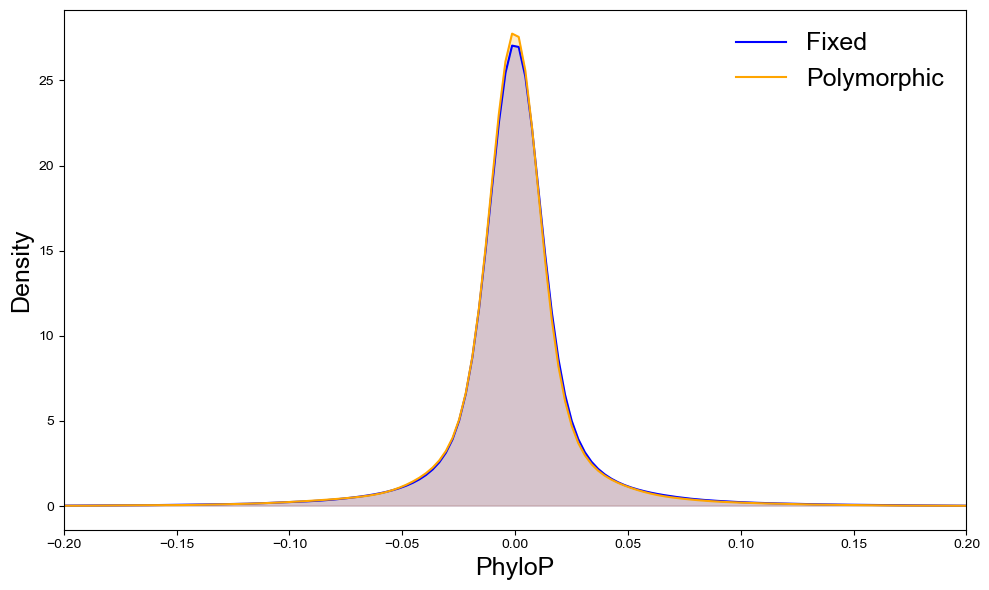

In [106]:

vvv = prepare_alpha(vf, vvf, stat = "Fixed EE_Dif")
compute_alpha_cutoff(vvv, plot = True, window = [-0.2, 0.2], cutoff = 0.1)

C:\Users\astar\AppData\Local\Temp\ipykernel_13368\3759902992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vrf["Rev EE_Dif"] = -vrf["Fixed EE_Dif"]
C:\Users\astar\AppData\Local\Temp\ipykernel_13368\3759902992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vvrf["Rev EE_Dif"] = -vvrf["Fixed EE_Dif"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

(0.14277492494908406,
 0.1,
 [[1003, 114022], [239, 31695]],
 [[1003, 114022], [239, 31695]],
 <Figure size 1000x600 with 1 Axes>)

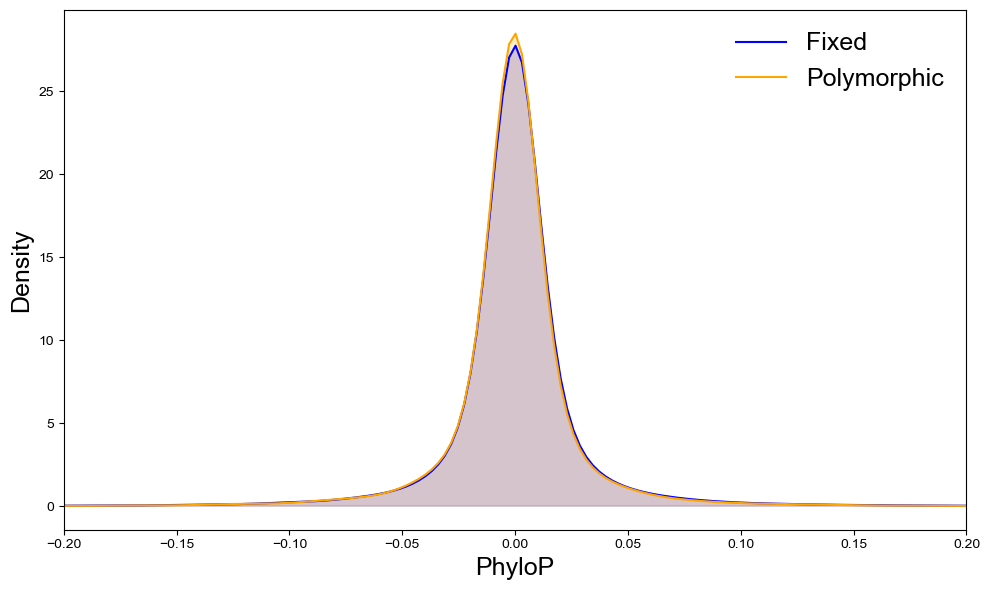

In [45]:
vrf["Rev EE_Dif"] = -vrf["Fixed EE_Dif"]
vvrf["Rev EE_Dif"] = -vvrf["Fixed EE_Dif"]

vvv = prepare_alpha(vrf, vvrf, stat = "Fixed EE_Dif")
compute_alpha_cutoff(vvv, plot = True, window = [-0.2, 0.2], cutoff = 0.1)

In [46]:
fisher_exact([[1003, 114022], [239, 31695]])

SignificanceResult(statistic=1.166554769691733, pvalue=0.03220550430419023)

In [56]:
vrf_big = vrf[vrf["Fixed EE_Dif"] > 0.025]

v2_fore = vrf_big.copy()

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]

#Need to change 
v2_fore.to_csv("EECut0.3_EEDif0.025_BackEEDifL0.005_Fixed_LSN_FilterNewTEs.bed", sep = "\t", header = None, index = None)

v2 = vrf.copy()

v2["Chrom"] = [x.split(":")[0] for x in v2["Position"]]
v2["Pos1"] = [int(x.split(":")[1]) for x in v2["Position"]]
v2["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2["Position"]]

#Set to 0.05 for MEF2A
#Change 0.025 to 0.1 for NFIB and other TFs with large effects on CA
v2_back = pd.concat([v2_fore, v2[v2["Fixed EE_Dif"] < 0.005]])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("EECut0.3_EEDif0.025_BackEEDifL0.005_Fixed_Background_New_preGC_FilterNewTEs.bed", sep = "\t", header = None, index = None)


In [98]:
vrf_big[vrf_big["NearestGene"] == "MAT2B"]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,...,EE_Allele2,EE_Dif,Fixed EE_Dif,Fixed logfc,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,fixed logfc,rev logfc,Rev EE_Dif
Position,,,,,,,,,,,,,,,,,,,,,
chr5:163689752,chr5:163689752,chr5:163689752,MAT2B,184142,4.929,1.000,440,-0.588955,2311.6174,1536.81900,...,0.413848,0.102268,0.102268,-0.588955,Fixed,.,.,-0.588955,0.588955,-0.102268
chr5:164102257,chr5:164102257,chr5:164102257,MAT2B,596647,2.168,1.000,442,-0.598425,1702.3959,1124.38890,...,0.403597,0.100131,0.100131,-0.598425,Fixed,.,.,-0.598425,0.598425,-0.100131
chr5:165089355,chr5:165089355,chr5:165089355,MAT2B,1583745,-1.555,0.000,408,-0.989789,2216.8318,1116.28860,...,0.362429,0.155463,0.155463,-0.989789,Fixed,.,.,-0.989789,0.989789,-0.155463
chr5:165213869,chr5:165213869,chr5:165213869,MAT2B,1708259,1.715,0.990,190,-0.710030,1969.4094,1203.91430,...,0.507864,0.116593,0.116593,-0.710030,Fixed,.,.,-0.710030,0.710030,-0.116593
chr5:165213889,chr5:165213889,chr5:165213889,MAT2B,1708279,0.182,0.003,190,-1.044091,1945.7790,943.60657,...,0.448699,0.175536,0.175536,-1.044091,Fixed,.,.,-1.044091,1.044091,-0.175536


In [99]:
vrf_big = vrf[vrf["Fixed EE_Dif"] > 0.1]
c = Counter(vrf_big["NearestGene"])

for key in c.keys():
    if c[key] >= 4:
        print(key, c[key])

PRMT6 5
BRINP3 4
RAG2 5
KIRREL3 4
SLITRK1 4
SETMAR 4
MAT2B 5
TYRP1 4


In [91]:
vrf_big.sort_values("PhyloP447").drop(["Position.1", "MAFMaxAcrossAncestry", "UnfoldedMAF"], axis = 1).tail(50)

,Position,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,EE_Allele1,EE_Allele2,EE_Dif,Fixed EE_Dif,Fixed logfc,FixedOrPoly,fixed logfc,rev logfc,Rev EE_Dif
Position,,,,,,,,,,,,,,,,,,,
chr21:36893910,chr21:36893910,HLCS,72737,0.094,0.000,352,-1.657733,3535.70870,1120.59620,1.657733,0.415796,0.184643,0.231154,0.231154,-1.657733,Fixed,-1.657733,1.657733,-0.231154
chr10:11054225,chr10:11054225,CELF2,111068,0.095,0.000,424,-2.068128,922.41956,219.96820,2.068128,0.321028,0.100751,0.220276,0.220276,-2.068128,Fixed,-2.068128,2.068128,-0.220276
chr2:188346307,chr2:188346307,GULP1,53953,0.095,0.012,423,-1.565719,2688.99730,908.36840,1.565719,0.510305,0.279750,0.230554,0.230554,-1.565719,Fixed,-1.565719,1.565719,-0.230554
chrX:99250931,chrX:99250931,PCDH19,1159262,0.097,0.000,221,-1.155915,1722.52440,773.03723,1.155915,0.556436,0.356147,0.200289,0.200289,-1.155915,Fixed,-1.155915,1.155915,-0.200289
chr4:187160709,chr4:187160709,FAT1,434045,0.100,0.000,332,-1.665620,1928.70130,607.94360,1.665620,0.466115,0.255980,0.210135,0.210135,-1.665620,Fixed,-1.665620,1.665620,-0.210135
chr3:4091742,chr3:4091742,SETMAR,211637,0.105,0.000,19,-1.237708,4337.48340,1839.29110,1.237708,0.574010,0.367818,0.206192,0.206192,-1.237708,Fixed,-1.237708,1.237708,-0.206192
chr3:85519737,chr3:85519737,CADM2,560749,0.201,0.000,185,-2.133533,1149.81050,262.04080,2.133533,0.383512,0.129907,0.253605,0.253605,-2.133533,Fixed,-2.133533,2.133533,-0.253605
chr8:75859534,chr8:75859534,HNF4G,319658,0.225,0.000,417,-1.397334,2144.98730,814.30176,1.397334,0.495976,0.280093,0.215884,0.215884,-1.397334,Fixed,-1.397334,1.397334,-0.215884
chr7:91169323,chr7:91169323,FZD1,95200,0.237,0.106,443,-1.298580,3897.20600,1584.31570,1.298580,0.427508,0.226178,0.201330,0.201330,-1.298580,Fixed,-1.298580,1.298580,-0.201330


In [102]:
ra = pd.read_csv("../Prime_DB_Expression/Agoglia_Fraser_2021/STAR/Hybrid_chpr/Agoglia_Fraser_2021_DESeq2_HumChp_Hybrid_CS_D100_chpr.txt", sep = "\t")

ra = ra[ra["Gene"].isin(vrf_big["NearestGene"])].dropna()
ras = ra[ra["padj"] < 0.05]
ras[ras["log2FoldChange"]  0].shape

(24, 5)

In [70]:
syngo = pd.read_csv("../Cell_Type_Prop/Cell_Type_Prop/syngo_genes.csv")
keep = syngo["hgnc_symbol"]

vrf_big[~vrf_big["NearestGene"].isin(keep)]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,...,EE_Allele2,EE_Dif,Fixed EE_Dif,Fixed logfc,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,fixed logfc,rev logfc,Rev EE_Dif
Position,,,,,,,,,,,,,,,,,,,,,
chr1:858833,chr1:858833,chr1:858833,SAMD11,66903,0.138,0.000,159,-1.026756,5234.4585,2569.13840,...,0.244093,0.092595,0.092595,-1.026756,Fixed,.,.,-1.026756,1.026756,-0.092595
chr1:4101954,chr1:4101954,chr1:4101954,C1orf174,201694,0.887,0.001,345,-0.460430,3053.7139,2219.34670,...,0.261144,0.111056,0.111056,-0.460430,Fixed,.,.,-0.460430,0.460430,-0.111056
chr1:11214937,chr1:11214937,chr1:11214937,ANGPTL7,25583,-0.659,0.000,419,-2.293776,4592.4670,936.59265,...,0.199155,0.266966,0.266966,-2.293776,Fixed,.,.,-2.293776,2.293776,-0.266966
chr1:11301834,chr1:11301834,chr1:11301834,UBIAD1,28478,-2.478,0.000,408,0.074923,9115.9770,9601.90300,...,0.634535,0.065764,0.065764,0.074923,Fixed,.,.,0.074923,-0.074923,-0.065764
chr1:13949264,chr1:13949264,chr1:13949264,PRDM2,244410,0.021,0.000,423,-0.604901,2792.0964,1835.84910,...,0.291354,0.064363,0.064363,-0.604901,Fixed,.,.,-0.604901,0.604901,-0.064363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:148941625,chrX:148941625,chrX:148941625,AFF2,440898,1.222,0.000,436,-0.480557,969.7736,695.03760,...,0.298269,0.075772,0.075772,-0.480557,Fixed,.,.,-0.480557,0.480557,-0.075772
chrX:151419989,chrX:151419989,chrX:151419989,VMA21,22772,-2.934,0.000,430,-0.351104,3589.9126,2814.43430,...,0.385387,0.057798,0.057798,-0.351104,Fixed,.,.,-0.351104,0.351104,-0.057798
chrX:155166311,chrX:155166311,chrX:155166311,VBP1,50134,0.985,0.000,255,-0.314928,2685.1880,2158.59940,...,0.564351,0.050098,0.050098,-0.314928,Fixed,.,.,-0.314928,0.314928,-0.050098


In [71]:
vrf[~vrf["NearestGene"].isin(keep)]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,...,EE_Allele2,EE_Dif,Fixed EE_Dif,Fixed logfc,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,fixed logfc,rev logfc,Rev EE_Dif
Position,,,,,,,,,,,,,,,,,,,,,
chr1:858833,chr1:858833,chr1:858833,SAMD11,66903,0.138,0.000,159,-1.026756,5234.45850,2569.1384,...,0.244093,0.092595,0.092595,-1.026756,Fixed,.,.,-1.026756,1.026756,-0.092595
chr1:858976,chr1:858976,chr1:858976,SAMD11,66760,-1.073,0.000,173,-0.034751,3915.90040,3822.7036,...,0.316732,0.027933,0.027933,-0.034751,Fixed,.,.,-0.034751,0.034751,-0.027933
chr1:859006,chr1:859006,chr1:859006,SAMD11,66730,1.887,0.001,159,-0.015714,3600.82620,3561.8193,...,0.352675,-0.002636,-0.002636,-0.015714,Fixed,.,.,-0.015714,0.015714,0.002636
chr1:2806550,chr1:2806550,chr1:2806550,TTC34,4857,0.100,0.000,342,-0.032688,3989.96800,3900.5823,...,0.314279,-0.004568,-0.004568,-0.032688,Fixed,.,.,-0.032688,0.032688,0.004568
chr1:2806564,chr1:2806564,chr1:2806564,TTC34,4871,0.449,0.000,421,-0.109760,4086.51030,3787.1420,...,0.311034,0.003176,0.003176,-0.109760,Fixed,.,.,-0.109760,0.109760,-0.003176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:155334973,chrX:155334973,chrX:155334973,H2AFB2,45805,0.579,0.199,357,-0.067997,12795.07200,12206.0100,...,0.405255,0.006141,0.006141,-0.067997,Fixed,.,.,-0.067997,0.067997,-0.006141
chrX:155335010,chrX:155335010,chrX:155335010,H2AFB2,45768,0.584,0.015,374,0.023310,11658.37700,11848.2710,...,0.410670,-0.007906,-0.007906,0.023310,Fixed,.,.,0.023310,-0.023310,0.007906
chrX:155546253,chrX:155546253,chrX:155546253,TMLHE,66674,-0.800,0.000,281,0.099827,1680.94750,1801.3794,...,0.390874,-0.016029,-0.016029,0.099827,Fixed,.,.,0.099827,-0.099827,0.016029


In [72]:
fisher_exact([[712, 3125], [21682 - 180, 93343 - 823]])

SignificanceResult(statistic=0.9803626081294763, pvalue=0.6594537431125824)